In [120]:
import re
import urllib.request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import random

import unicodedata
import unicodeblock.blocks

def kanaOnly(s):
    result = ''   
    for c in s:
        if unicodeblock.blocks.of(c) in ['HIRAGANA', 'KATAKANA']:
            result += c
    return result

def getBlocks(s):
    return [unicodeblock.blocks.of(c) for c in s]

def blockPattern(s):
    return ''.join([unicodeblock.blocks.of(c)[0] for c in s])
    

In [140]:
Anki = pd.read_csv('data/Core Japanese Vocabulary Extended.txt', 
                   sep='\t', header=None, 
                   names=['jp', 'en', 'jp_kana', 'pos', 'more_en', 'sound', 'level'])[['jp', 'en', 
                                                    'jp_kana', 'pos', 'more_en', 'level']]

Anki.level = Anki.level.fillna('jlpt-n0').apply(lambda s: s[-7:]) # The last level marker is always the lowest
Anki.pos = Anki.pos.fillna('None') # These mostly seem like interjections
Anki['kana'] = Anki.jp_kana.fillna('').apply(kanaOnly)
Anki['pattern'] = Anki.jp.apply(blockPattern)

JLPT = Anki[Anki.level != 'jlpt-n0']

Anki.sample(20)

,jp,en,jp_kana,pos,more_en,level,kana,pattern
7229,尖る,"to taper to a point, to become pointed, to bec...",尖[とが]る,"Godan verb with ru ending, intransitive verb","to look displeased, to look sour, to be on edg...",jlpt-n2,とがる,CH
294,女,"female, woman, female sex",女[おんな],"Noun, Noun - used as a prefix","female lover, girlfriend, mistress, (someone's...",jlpt-n5,おんな,C
12511,再検討,"re-examination, review, reappraisal",再検討[さいけんとう],"Noun, Suru verb",NaN,jlpt-n0,さいけんとう,CCC
3955,区切る,"to demarcate, to delimit, to divide (an area),...",区切[くぎ]る,"Godan verb with ru ending, Transitive verb","to punctuate, to put an end to (e.g. a sentenc...",jlpt-n2,くぎる,CCH
6501,マスコミ,"mass communication, mass media",マスコミ,Noun,NaN,jlpt-n1,マスコミ,KKKK
6495,あら,"oh, ah",あら,None,NaN,jlpt-n1,あら,HH
1806,表現,"expression, presentation",表現[ひょうげん],"Noun, Suru verb","representation, notation",jlpt-n3,ひょうげん,CC
17260,ヘルパー,helper,ヘルパー,Noun,NaN,jlpt-n0,ヘルパー,KKKK
10093,前面,"front part, frontage, facade",前面[ぜんめん],Noun,"initial pledge (e.g. election), opening slogan",jlpt-n0,ぜんめん,CC
10502,迷う,to lose one's way,迷[まよ]う,"Godan verb with u ending, intransitive verb","to waver, to hesitate, to be of two minds over...",jlpt-n0,まよう,CH


<AxesSubplot:ylabel='level'>

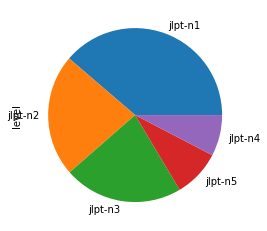

In [78]:
JLPT.level.value_counts()[:].plot.pie()

In [124]:
JLPT[JLPT.pos.fillna('').str.contains('Suru verb')].sample(20)

,jp,en,jp_kana,pos,more_en,level,kana
5034,向上,"elevation, rise, improvement, advancement, pro...",向上[こうじょう],"Noun, Suru verb",NaN,jlpt-n1,こうじょう
1386,広告,advertisement,広告[こうこく],"Noun, Suru verb, No-adjective",NaN,jlpt-n3,こうこく
5999,恋する,"to fall in love with, to love",恋[こい]する,Suru verb - special class,NaN,jlpt-n1,こいする
3337,縮小,"reduction, curtailment",縮小[しゅくしょう],"Noun, Suru verb, No-adjective",NaN,jlpt-n2,しゅくしょう
6884,兼業,"perusing as a side business, doing in addition...",兼業[けんぎょう],"Noun, Suru verb","side business, job on the side",jlpt-n1,けんぎょう
675,戦争,war,戦争[せんそう],"Noun, Suru verb","fighting, fierce competition",jlpt-n4,せんそう
3750,仮定,"assumption, supposition, hypothesis",仮定[かてい],"Noun, Suru verb",NaN,jlpt-n2,かてい
1679,滞在,"stay, sojourn",滞在[たいざい],"Noun, Suru verb",NaN,jlpt-n3,たいざい
4323,自習,"self-study, teaching oneself",自習[じしゅう],"Noun, Suru verb, No-adjective",NaN,jlpt-n2,じしゅう
1411,輸出,"export, exportation",輸出[ゆしゅつ],"Noun, Suru verb",efferent,jlpt-n3,ゆしゅつ


In [125]:
JLPT[JLPT.pos.fillna('').str.contains("Adverb taking the ")].sample(20)

,jp,en,jp_kana,pos,more_en,level,kana
6535,きっちり,"exactly, precisely, punctually, on the dot",きっちり,"Adverb, Adverb taking the 'to' particle, Suru ...","closely, tightly, (fitting) perfectly; properl...",jlpt-n1,きっちり
2763,ぼんやり,"dimly, faintly, indistinctly, vaguely",ぼんやり,"Adverb, Adverb taking the 'to' particle, Suru ...","absentmindedly, vacantly, carelessly; idly, ai...",jlpt-n3,ぼんやり
1178,はっきり,"clearly, plainly, distinctly",はっきり,"Adverb, Adverb taking the 'to' particle","to be clear, to be definite, to be certain, to...",jlpt-n4,はっきり
6946,ちやほや,"to pamper, to make a fuss of, to spoil, to faw...",ちやほや,"Suru verb, Adverb, Adverb taking the 'to' part...",NaN,jlpt-n1,ちやほや
6133,長々,"long, drawn-out, very long",長々[ながなが],"Adverb taking the 'to' particle, Adverb",NaN,jlpt-n1,ながなが
6523,ずばり,"decisively, decidedly, boldly, once and for al...",ずばり,"Adverb, Adverb taking the 'to' particle","precisely, exactly",jlpt-n1,ずばり
4157,ぶつぶつ,"grunt, grumble, complaint, mutter",ぶつぶつ,"Noun, Adverb, Adverb taking the 'to' particle","pimples, spots, eruption, rash; cutting into s...",jlpt-n2,ぶつぶつ
4119,点々,"here and there, little by little, sporadically...",点々[てんてん],"Adverb, Adverb taking the 'to' particle","dots, spots",jlpt-n2,てんてん
4381,はきはき,"briskly, smartly, promptly, clearly, lucidly",はきはき,"Adverb taking the 'to' particle, Adverb, Suru ...",NaN,jlpt-n2,はきはき
3030,転々,"moving from place to place, being passed aroun...",転々[てんてん],"Adverb, Adverb taking the 'to' particle, Noun,...",rolling about,jlpt-n2,てんてん


In [89]:
# 51 terms
JLPT[JLPT.jp.str.contains('々')]

,jp,en,jp_kana,pos,more_en,level
249,時々,"sometimes, at times",時々[ときどき],"Adverb, Noun, No-adjective",NaN,jlpt-n5
442,色々,"various, all sorts of, variety of",色々[いろいろ],"Na-adjective, No-adjective, Adverb, Adverb tak...",various colors (colours),jlpt-n5
464,段々,"gradually, by degrees, little by little, more ...",段々[だんだん],"Adverb, Adverb taking the 'to' particle","steps, stairs, staircase, terrace",jlpt-n5
1582,屡々,"often, again and again, frequently, repeatedly",屡々[しばしば],Adverb,NaN,jlpt-n3
1621,我々,we,我々[われわれ],Pronoun,NaN,jlpt-n3
1824,様々,"varied, various",様々[さまざま],"Na-adjective, Noun",NaN,jlpt-n3
1940,次々,"in succession, one by one",次々[つぎつぎ],"Adverb, Adverb taking the 'to' particle, Noun",NaN,jlpt-n3
1964,徐々,"slow, gradual, steady",徐々[じょじょ],"Taru-adjective, Adverb taking the 'to' particle","calm, composed, relaxed",jlpt-n3
1969,少々,"just a minute, small quantity",少々[しょうしょう],"Adverbial noun, Noun",NaN,jlpt-n3
2094,度々,"often, again and again, over and over again, r...",度々[たびたび],Adverb,NaN,jlpt-n3


In [128]:
unicodeblock.blocks.of('々')

'CJK_SYMBOLS_AND_PUNCTUATION'

In [141]:
JLPT.jp.apply(blockPattern).value_counts()

CC       3612
CH        821
C         744
CHH       621
KKKK      179
         ... 
KKKKC       1
CHKK        1
FFF         1
FKKK        1
FFFF        1
Name: jp, Length: 78, dtype: int64

In [135]:
JLPT[JLPT.jp.apply(lambda x: 'FULLWIDTH_LATIN' in getBlocks(x))]

,jp,en,jp_kana,pos,more_en,level,kana
499,Ｙシャツ,"shirt, business shirt, dress shirt",Ｙシャツ,Noun,NaN,jlpt-n5,シャツ
653,ＰＥＴ,"polyethylene terephthalate, PET",ＰＥＴ,Noun,"positron emission tomography, PET",jlpt-n5,
6574,ＯＫ,OK,ＯＫ,Expression,NaN,jlpt-n1,
6828,Ｇパン,"jeans, dungarees",Ｇパン,Noun,NaN,jlpt-n1,パン
7013,ＬＡＭＰ,"LAMP, solution stack of free, open source soft...",ＬＡＭＰ,Noun,NaN,jlpt-n1,


In [154]:
JLPT[(JLPT.pattern=='CH')&(JLPT.kana.str.len()>3)].sample(20)

,jp,en,jp_kana,pos,more_en,level,kana,pattern
471,煩い,"noisy, loud",煩[うるさ]い,I-adjective,"annoying, troublesome, tiresome, persistent, i...",jlpt-n5,うるさい,CH
4830,傍ら,"side, edge, beside, besides, nearby",傍[かたわ]ら,"No-adjective, Adverbial noun, Temporal noun","while (doing), in addition to, at the same time",jlpt-n1,かたわら,CH
3726,承る,"to hear, to be told, to know",承[うけたまわ]る,"Godan verb with ru ending, Transitive verb","to receive (order), to undertake, to comply, t...",jlpt-n2,うけたまわる,CH
2359,頂く,"to receive, to get, to accept, to take, to buy",頂[いただ]く,"Godan verb with ku ending, Transitive verb","to eat, to drink; to be crowned with, to wear ...",jlpt-n3,いただく,CH
2017,鋭い,"sharp (blade), pointed",鋭[するど]い,I-adjective,"sharp (pain), stabbing, cutting (remark), stin...",jlpt-n3,するどい,CH
6817,潤う,"to be moist, to be damp, to get wet, to be wat...",潤[うるお]う,"Godan verb with u ending, intransitive verb","to profit by, to receive benefits, to receive ...",jlpt-n1,うるおう,CH
2310,誠に,"indeed, really, absolutely, truly, actually, v...",誠[まこと]に,Adverb,NaN,jlpt-n3,まことに,CH
5826,遮る,"to interrupt, to obstruct (a view, someone's w...",遮[さえぎ]る,"Godan verb with ru ending, Transitive verb",NaN,jlpt-n1,さえぎる,CH
1653,失う,to lose,失[うしな]う,"Godan verb with u ending, Transitive verb","to miss (a change, opportunity); to lose (a lo...",jlpt-n3,うしなう,CH
1030,暫く,"for a moment, for a minute",暫[しばら]く,"Adverb, Suru verb","for a while, for some time; for the time being...",jlpt-n4,しばらく,CH


In [153]:
JLPT[(JLPT.pattern=='CHH')&(JLPT.kana.str.len()>5)] #.sample(20)

,jp,en,jp_kana,pos,more_en,level,kana,pattern
5898,著しい,"striking, remarkable, considerable",著[いちじる]しい,I-adjective,NaN,jlpt-n1,いちじるしい,CHH
7398,夥しい,"large number, innumerable, great many, immense...",夥[おびただ]しい,I-adjective,NaN,jlpt-n1,おびただしい,CHH
